In [63]:
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
%matplotlib inline

In [64]:
url = (
'https://api.coronavirus.data.gov.uk/v1/data?'
'filters=areaType=overview&'
'structure={"date":"date","newCases":"newCasesByPublishDate", "newTests":"newTestsByPublishDate"}'
)
response = get(url, timeout=10)
    
if response.status_code >= 400:
    raise RuntimeError(f'Request failed: { response.text }')
        
COVIDData = response.json()

COVIDDF = pd.DataFrame(COVIDData["data"])
COVIDDF

,date,newCases,newTests
0,2020-12-23,39237,NaN
1,2020-12-22,36804,456252.0
2,2020-12-21,33364,426132.0
3,2020-12-20,35928,433950.0
4,2020-12-19,27052,442246.0
...,...,...,...
351,2020-01-07,0,NaN
352,2020-01-06,0,NaN
353,2020-01-05,0,NaN
354,2020-01-04,0,NaN


In [65]:
FTSEData = pd.read_csv("FTSE.csv")
FTSEData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,5563.700195,5702.700195,5545.899902,5672.000000,5672.000000,1602112800
1,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,5454.600098,1670362100
2,2020-04-02,5454.600098,5552.399902,5395.100098,5480.200195,5480.200195,1554286900
3,2020-04-03,5480.200195,5486.299805,5396.700195,5415.500000,5415.500000,1180517400
4,2020-04-06,5415.500000,5590.600098,5415.500000,5582.399902,5582.399902,1207951800
...,...,...,...,...,...,...,...
176,2020-12-09,6558.799805,6623.000000,6558.799805,6564.299805,6564.299805,769345300
177,2020-12-10,6564.299805,6640.700195,6561.100098,6599.799805,6599.799805,1109877200
178,2020-12-11,6599.799805,6607.399902,6520.500000,6546.799805,6546.799805,1069085700
179,2020-12-14,6546.799805,6583.700195,6524.700195,6531.799805,6531.799805,870265400


In [66]:
GDPData = pd.read_csv("GDP_growth.csv")
GDPData["date"] = pd.to_datetime(GDPData["Month"], format="%Y%b")
GDPData

,Month,Monthly GDP,date
0,1997JAN,64.3701,1997-01-01
1,1997FEB,65.2410,1997-02-01
2,1997MAR,65.5841,1997-03-01
3,1997APR,65.7258,1997-04-01
4,1997MAY,65.2434,1997-05-01
...,...,...,...
281,2020JUN,84.8003,2020-06-01
282,2020JUL,90.1325,2020-07-01
283,2020AUG,92.0744,2020-08-01
284,2020SEP,93.0477,2020-09-01


In [67]:
COVIDDF.dropna(inplace=True)
COVIDDF["newTests"] = COVIDDF["newTests"].astype(int)
COVIDDF["positive Test Percentage"] = 2
COVIDDF["positive Test Percentage"] = COVIDDF["positive Test Percentage"].astype(float)
COVIDDF['positive Test Percentage'] = list(map(lambda x,y: x/y, COVIDDF['newCases'],COVIDDF['newTests']))
COVIDDF["positive Test Percentage"] = COVIDDF["positive Test Percentage"] * 100

COVIDDF['date'] = pd.to_datetime(COVIDDF['date'], dayfirst = False, yearfirst = False)
COVIDDF.sort_values(by=["date"], inplace=True, ascending=True)

COVIDDF

,date,newCases,newTests,positive Test Percentage
267,2020-03-31,3250,11896,27.320108
266,2020-04-01,4567,11947,38.227170
265,2020-04-02,4522,13623,33.193863
264,2020-04-03,4672,14629,31.936564
263,2020-04-04,4000,16080,24.875622
...,...,...,...,...
5,2020-12-18,28507,394152,7.232489
4,2020-12-19,27052,442246,6.116958
3,2020-12-20,35928,433950,8.279295
2,2020-12-21,33364,426132,7.829499


In [68]:
FTSEData.rename(columns={"Date": "date"}, inplace=True)
FTSEData['date'] = pd.to_datetime(FTSEData['date'], dayfirst = False, yearfirst = False)
FTSEData.sort_values(by=["date"], inplace=True, ascending=True)
FTSEData["Average"] = (FTSEData["High"] + FTSEData["Low"])/ 2
FTSEData

,date,Open,High,Low,Close,Adj Close,Volume,Average
0,2020-03-31,5563.700195,5702.700195,5545.899902,5672.000000,5672.000000,1602112800,5624.300049
1,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,5454.600098,1670362100,5543.350098
2,2020-04-02,5454.600098,5552.399902,5395.100098,5480.200195,5480.200195,1554286900,5473.750000
3,2020-04-03,5480.200195,5486.299805,5396.700195,5415.500000,5415.500000,1180517400,5441.500000
4,2020-04-06,5415.500000,5590.600098,5415.500000,5582.399902,5582.399902,1207951800,5503.050049
...,...,...,...,...,...,...,...,...
176,2020-12-09,6558.799805,6623.000000,6558.799805,6564.299805,6564.299805,769345300,6590.899902
177,2020-12-10,6564.299805,6640.700195,6561.100098,6599.799805,6599.799805,1109877200,6600.900147
178,2020-12-11,6599.799805,6607.399902,6520.500000,6546.799805,6546.799805,1069085700,6563.949951
179,2020-12-14,6546.799805,6583.700195,6524.700195,6531.799805,6531.799805,870265400,6554.200195


In [69]:
CovidFTSEDF = COVIDDF.merge(FTSEData, on="date")
CovidFTSEDF

,date,newCases,newTests,positive Test Percentage,Open,High,Low,Close,Adj Close,Volume,Average
0,2020-03-31,3250,11896,27.320108,5563.700195,5702.700195,5545.899902,5672.000000,5672.000000,1602112800,5624.300049
1,2020-04-01,4567,11947,38.227170,5672.000000,5672.000000,5414.700195,5454.600098,5454.600098,1670362100,5543.350098
2,2020-04-02,4522,13623,33.193863,5454.600098,5552.399902,5395.100098,5480.200195,5480.200195,1554286900,5473.750000
3,2020-04-03,4672,14629,31.936564,5480.200195,5486.299805,5396.700195,5415.500000,5415.500000,1180517400,5441.500000
4,2020-04-06,4143,13775,30.076225,5415.500000,5590.600098,5415.500000,5582.399902,5582.399902,1207951800,5503.050049
...,...,...,...,...,...,...,...,...,...,...,...
176,2020-12-09,16578,372446,4.451115,6558.799805,6623.000000,6558.799805,6564.299805,6564.299805,769345300,6590.899902
177,2020-12-10,20964,404236,5.186079,6564.299805,6640.700195,6561.100098,6599.799805,6599.799805,1109877200,6600.900147
178,2020-12-11,21672,395510,5.479507,6599.799805,6607.399902,6520.500000,6546.799805,6546.799805,1069085700,6563.949951
179,2020-12-14,20263,277944,7.290317,6546.799805,6583.700195,6524.700195,6531.799805,6531.799805,870265400,6554.200195


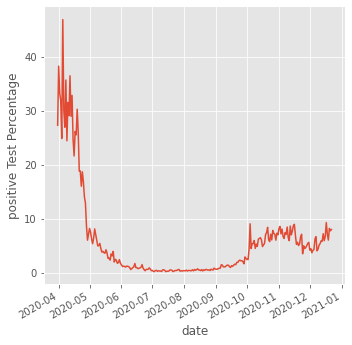

In [70]:
style.use('ggplot')

g = sns.relplot(x="date", y="positive Test Percentage", kind="line", data=COVIDDF)
g.fig.autofmt_xdate()
plt.show()

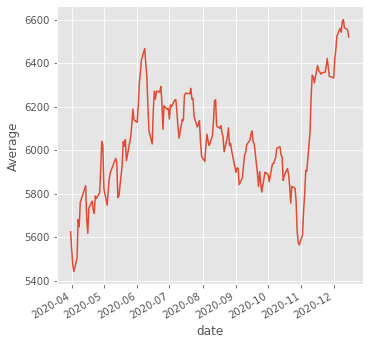

In [71]:

g = sns.relplot(x="date", y="Average", kind="line", data=FTSEData)
g.fig.autofmt_xdate()
plt.show()

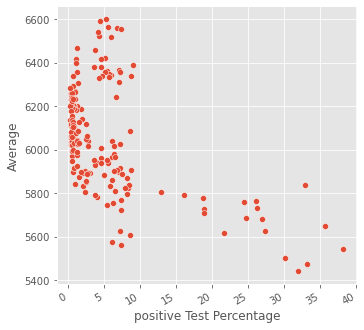

In [72]:
g = sns.relplot(x="positive Test Percentage", y="Average", data=CovidFTSEDF)
g.fig.autofmt_xdate()
plt.show()

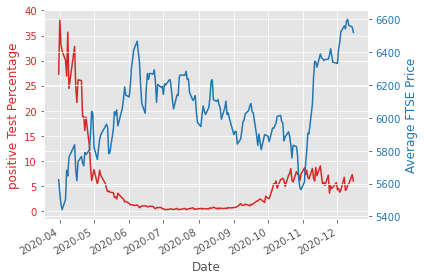

In [73]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('positive Test Percentage', color=color)
ax1.plot(CovidFTSEDF["date"], CovidFTSEDF["positive Test Percentage"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average FTSE Price', color=color)  # we already handled the x-label with ax1
ax2.plot(CovidFTSEDF["date"], CovidFTSEDF["Average"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [74]:
CovidGDP = COVIDDF.merge(GDPData, on="date")
CovidGDP

,date,newCases,newTests,positive Test Percentage,Month,Monthly GDP
0,2020-04-01,4567,11947,38.227170,2020APR,75.7041
1,2020-05-01,6201,74893,8.279813,2020MAY,77.7445
2,2020-06-01,1570,101571,1.545717,2020JUN,84.8003
3,2020-07-01,829,157131,0.527585,2020JUL,90.1325
4,2020-08-01,761,162088,0.469498,2020AUG,92.0744
5,2020-09-01,1295,175687,0.737106,2020SEP,93.0477
6,2020-10-01,6914,271552,2.546105,2020OCT,93.4276


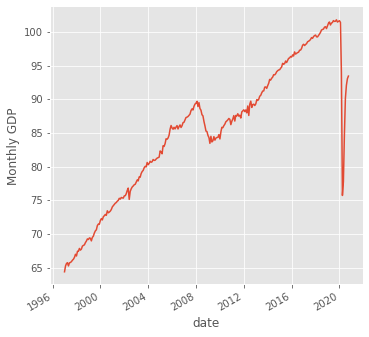

In [75]:
g = sns.relplot(x="date", y="Monthly GDP", kind="line", data=GDPData)
g.fig.autofmt_xdate()
plt.show()

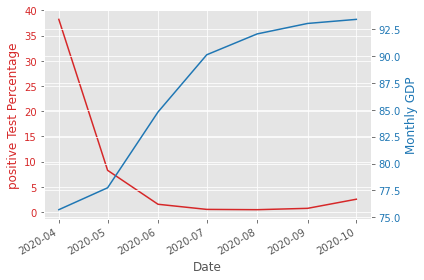

In [76]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('positive Test Percentage', color=color)
ax1.plot(CovidGDP["date"], CovidGDP["positive Test Percentage"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly GDP', color=color)  # we already handled the x-label with ax1
ax2.plot(CovidGDP["date"], CovidGDP["Monthly GDP"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

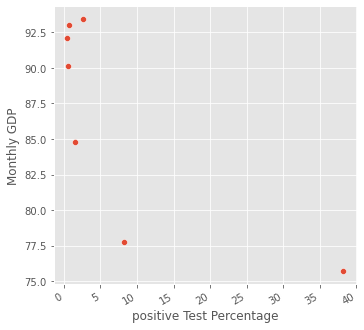

In [77]:
g = sns.relplot(x="positive Test Percentage", y="Monthly GDP", data=CovidGDP)
g.fig.autofmt_xdate()
plt.show()